# Heart Disease Prediction

### Importing important libraries and Dataset

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
heart_df = pd.read_csv('./heart.csv')
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data pre-processing and Data cleaning

In [4]:
heart_df.shape

(303, 14)

In [5]:
heart_df.info

<bound method DataFrame.info of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  ou

In [6]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
heart_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Data is already clean and no cleaning or processing is rrequired

### Exploratory Data Analysis

Analyzing the amount people who encountered heart disease

Text(0.5, 1.0, 'Heart disease chance(0: less chance  ||  1 : more chance)')

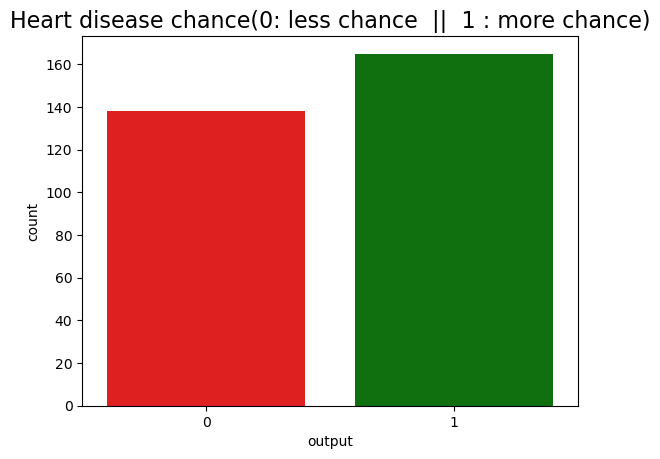

In [12]:
colors = ["red", "green"]

sns.countplot(x='output',data=heart_df,palette=colors)
plt.title('Heart disease chance(0: less chance  ||  1 : more chance)', fontsize=16)

Understanding Age Distibution

C:\Users\Akshay R\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


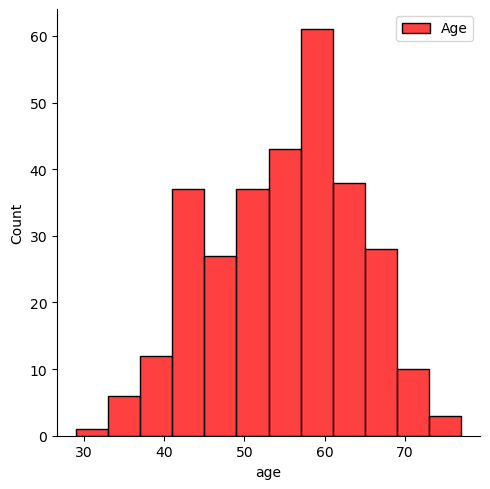

In [14]:
sns.displot(heart_df.age, color="red", label="Age")
plt.legend()

Comparing Gender ratio in the data set

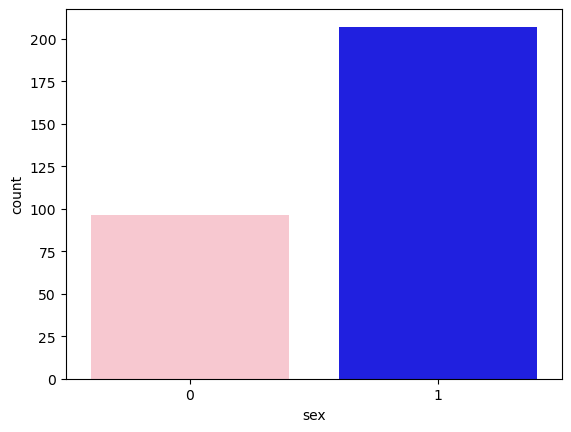

In [20]:
sns.countplot(x='sex',data=heart_df,palette=['pink','blue'])
plt.show()

Cholesterol distribution of the people in dataset

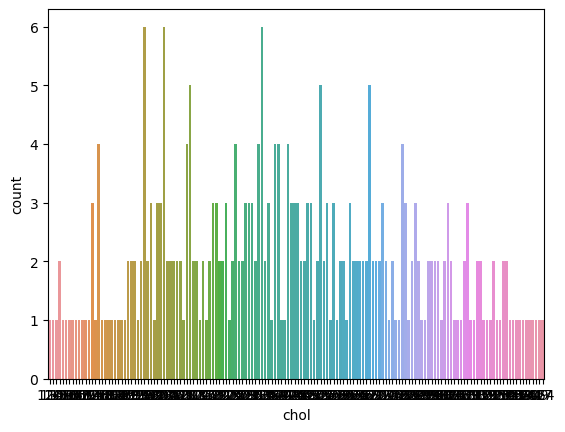

In [23]:
sns.countplot(x='chol',data=heart_df)
plt.show()

<Axes: >

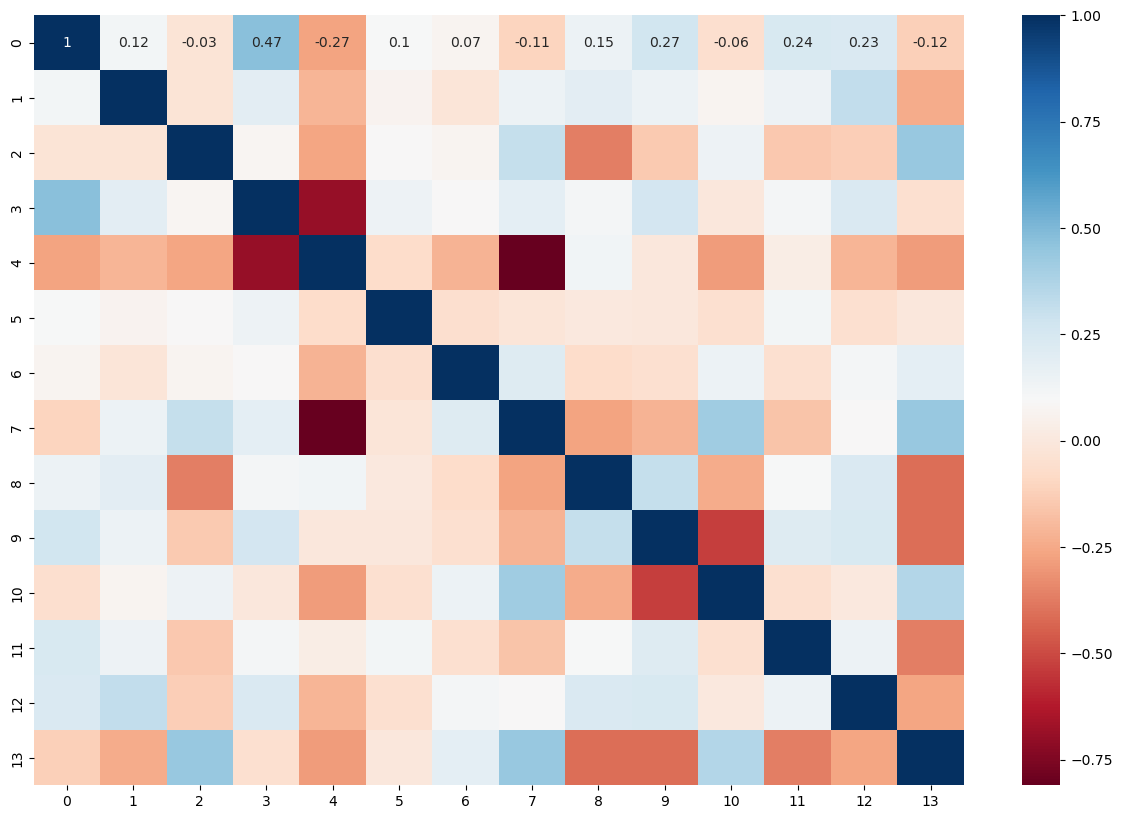

In [25]:
from sklearn.preprocessing import Normalizer
nom=Normalizer(norm='l2')
data_norm=nom.fit_transform(heart_df)

corr=np.corrcoef(data_norm,rowvar=False)

plt.figure(figsize=(15,10))
corr_rounded = np.round(corr,2)
sns.heatmap(corr_rounded, cmap='RdBu', annot=True)

### Modelling and building Model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

separating dependent and independent variables:

In [29]:
x = heart_df.iloc[:,[1,2,3,5,6,7,8,9,10,11,12]]
y = heart_df.iloc[:,-1]

Splitting train and test data:

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

#### SVM Model building 

In [32]:
svm = SVC(kernel='linear',random_state = 5)
svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=5)

In [36]:
pre = svm.predict(x_test)
acc = accuracy_score(y_test,pre)
print('The accuarcy of the model is : ',acc)

The accuarcy of the model is :  0.8688524590163934


Note: After testing the model, The SVM model has an accuracy of 86%

#### Random forest Classifier Model Building

In [37]:
rfc = RandomForestClassifier(random_state=3)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=3)

In [38]:
pre = rfc.predict(x_test)
acc = accuracy_score(y_test,pre)
print('The accuarcy of the model is : ',acc)

The accuarcy of the model is :  0.9016393442622951


Note: After testing the model, The SVM model has an accuracy of 90%

### Testing Random generated sample data

In [42]:
sample_data = pd.DataFrame({
    'sex': [1],            # Example: 1 for male, 0 for female
    'cp': [3],             # Example chest pain type: 0, 1, 2, or 3
    'trtbps': [130],       # Example resting blood pressure in mm HgH
    'fbs': [0],            # Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    'restecg': [1],        # Example ECG result: 0, 1, or 2
    'thalachh': [150],     # Example maximum heart rate achieved
    'exng': [0],           # Exercise induced angina (1 = yes; 0 = no)
    'oldpeak': [1.0],      # ST depression induced by exercise relative to rest
    'slp': [2],            # The slope of the peak exercise ST segment: 0, 1, 2
    'caa': [0],            # Number of major vessels (0-3) colored by fluoroscopy
    'thall': [2]           # Thalassemia: 0, 1, 2, 3
})

# Use the model to predict the class of this new input
predicted_class = rfc.predict(sample_data)

# Print the predicted class
print("Predicted class:", predicted_class[0])

# If you want to see the predicted probabilities for each class:
predicted_proba = rfc.predict_proba(sample_data)
print("Probabilities for each class:", predicted_proba[0])

Predicted class: 1
Probabilities for each class: [0.11 0.89]


Insights: The model has predicted that there is a high risk of heart disease for the given set of data